### Imports

In [ ]:
import dash
from dash import dcc
from dash import html
import plotly.express as px
import pandas as pd

### Read data

In [ ]:
# Read in the data
data = pd.read_csv("precious_metals_prices_2018_2021.csv", usecols=["DateTime", "Gold"])

# Convert Datetime column to datetime datatype
data['DateTime'] = pd.to_datetime(data['DateTime'], format='%Y-%m-%d')

### Create Figure

In [ ]:
# Create a plotly plot for use by dcc.Graph(). Notice list for y= to make color_discrete_map work
fig = px.line(
    data,
    title="Precious Metal Prices 2018-2021",
    x="DateTime",
    y=["Gold"],
    color_discrete_map={"Gold": "gold"}
)

### Update Layout

In [ ]:
# This piece is no longer required, since this will be returned by the function with each selection

# fig.update_layout(
#     template="plotly_dark",
#     xaxis_title="Date",
#     yaxis_title="Price (USD/oz)",
#     font=dict(
#         family="Verdana, sans-serif",
#         size=18,
#         color="white"
#     ),
# )

### Define App Layout

In [ ]:
app = dash.Dash(__name__)
app.title = "Precious Metal Prices 2018-2021"

app.layout = html.Div(
    id="app-container",
    children=[
        html.Div(
            id="header-area",
            children=[
                html.H1(
                    id="header-title",
                    children="Precious Metal Prices",

                ),
                html.P(
                    id="header-description",
                    children=("The cost of precious metals", html.Br(), "between 2018 and 2021"),
                ),
            ],
        ),
        html.Div(
            id="menu-area",
            children=[
                html.Div(
                    children=[
                        html.Div(
                            className="menu-title",
                            children="Metal"
                        ),
                        dcc.Dropdown(
                            id="metal-filter",
                            className="dropdown",
                            options=[{"label": metal, "value": metal} for metal in data.columns[1:]],
                            clearable=False,
                            value="Gold"
                        )
                    ]
                ),
                html.Div(
                    children=[
                        html.Div(
                            className='menu-title',
                            children='Date Range'
                        ),
                        dcc.DatePickerRange(
                            id='date-range',
                            min_date_allowed=data.DateTime.min().date(),
                            max_date_allowed=data.DateTime.max().date(),
                            start_date=data.DateTime.min().date(),
                            end_date=data.DateTime.max().date()
                        )
                    ]
                )
            ]
        ),
        html.Div(
            id="graph-container",
            children=dcc.Graph(
                id="price-chart",
                figure=fig,
                config={"displayModeBar": False}
            ),
        ),
    ]
)

### Add Callbacks

In [ ]:
@app.callback(
    Output("price-chart", "figure"),
    Input("metal-filter", "value"),
    Input("date-range", "start_date"),
    Input("date-range", "end_date")
)

### Add Callback Function

In [ ]:
def update_chart(metal, start_date, end_date):

    filtered_data = data.loc[(data['DateTime'] >= start_date) & (data['DateTime'] <= end_date)]
    # Create a plotly plot for use by dcc.Graph().
    fig = px.line(
        filtered_data,
        title="Precious Metal Prices 2018-2021",
        x="DateTime",
        y=[metal],
        color_discrete_map={
            "Platinum": "#E5E4E2",
            "Gold": "gold",
            "Silver": "silver",
            "Palladium": "#CED0DD",
            "Rhodium": "#E2E7E1",
            "Iridium": "#3D3C3A",
            "Ruthenium": "#C9CBC8"
        }
    )

    fig.update_layout(
        template="plotly_dark",
        xaxis_title="Date",
        yaxis_title="Price (USD/oz)",
        font=dict(
            family="Verdana, sans-serif",
            size=18,
            color="white"
        ),
    )

    return fig

### Run the app

In [ ]:
if __name__ == "__main__":
    app.run_server(debug=True)

This is how the output looks like -

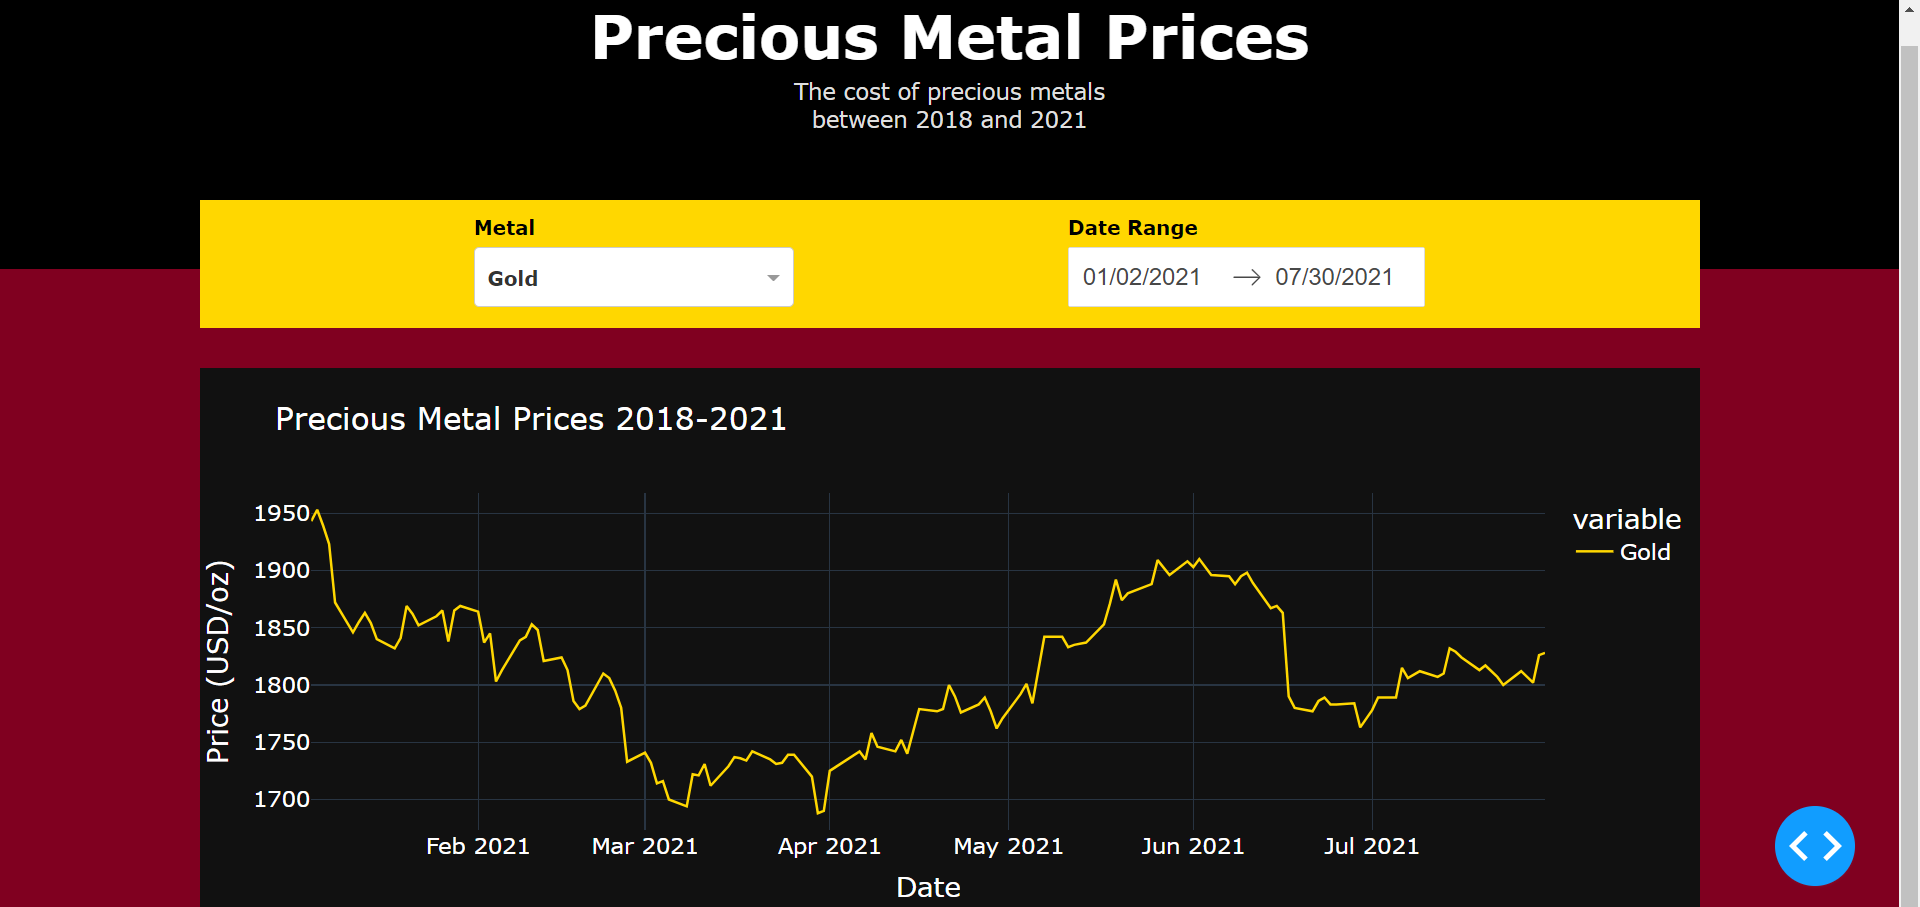

Just like before, for every selection, function 'update_chart' returns the updated chart that goes into graph-container.

We also added the Date Range picker in the same 'menu-area' as the metal filter dropdown